In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.sync_utlis.sync_df_utlis import process_sync


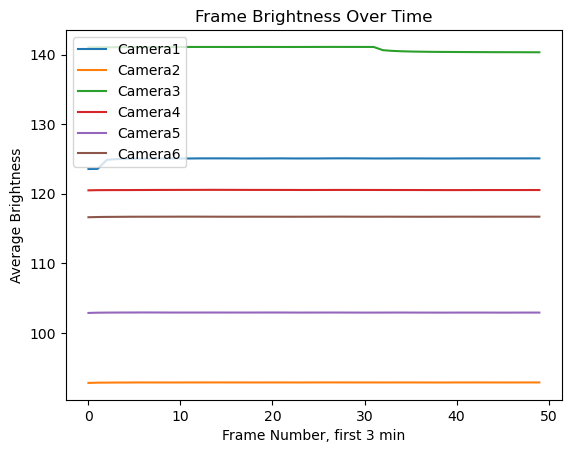

Detected intensity drop frames in /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3: {'Camera1': [], 'Camera2': [], 'Camera3': [], 'Camera4': [], 'Camera5': [], 'Camera6': []}
Skipping process_calibration_data for /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3 due to missing drop frames


'/home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3'

In [3]:
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

base_folder = '/home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3'

process_sync(base_folder, threshold=3, max_frames=50)

In [ ]:
def rough_bundle_sync(base_path, dates, threshold=3, max_frames=500, stepmax_frame = 1000):
    missing_folders = []
    successful_folders = []

    for date in dates:
        date_path = os.path.join(base_path, date)
        if not os.path.exists(date_path):
            print(f"Date folder {date_path} does not exist. Skipping.")
            continue

        calib_file = find_calib_file(date_path)
        print("find calib files", calib_file)
        if not calib_file:
            print(f"No calibration file found in {date_path}. Skipping.")
            continue

        calib_nammm = os.path.basename(calib_file)
        # print(calib_nammm)

        for folder_name in os.listdir(date_path):
            folder_path = os.path.join(date_path, folder_name)

            if os.path.isdir(folder_path) and folder_name[0].isdigit():
                save_path = os.path.join(folder_path, f'df_synced_{folder_name}_{calib_nammm}') #f'pos_synced_{folder_name}_{calib_nammm}'
                vi_path = os.path.join(folder_path, 'videos')

                drop_frames = process_videos(vi_path, threshold, max_frames)
                print(f"Detected intensity drop frames in {folder_name}:", drop_frames)

                if any(len(frames) == 0 for frames in drop_frames.values()):
                    missing_folders.append(folder_path)
                    print(f"Skipping process_calibration_data for {folder_name} due to missing drop frames")
                else:
                    successful_folders.append(folder_path)
                    align_frames(calib_file, drop_frames, save_path)
                    # update_calib(calib_file, drop_frames, save_path)
                    # print('h')

    print('Missing folders:', missing_folders)
    return missing_folders, successful_folders

In [ ]:
# also adding the exe generation for mir_generate param, for future references:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# base_path = 'G:/Videos/6cam/lq53/2024_09_16_test_chris_new/'
# calib_path = os.path.join(base_path, 'calib_before_3/chris_new/')
# vid_path = 'rec_test_1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)